In [399]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as plticker

In [400]:
bike = pd.read_csv('seoulbike.csv')
bike.head()
bike['move_time'].max()

105489

In [401]:
bike.dtypes

rent_date         int64
station_no        int64
rent_type        object
gender           object
age_type         object
use_no            int64
exercise_amt    float64
carbon_amt      float64
move_meter      float64
move_time         int64
dtype: object

In [402]:
bike['station_no'].astype(object)

0          102
1          102
2          102
3          102
4          102
          ... 
622061    6054
622062    6054
622063    6054
622064    6054
622065    6054
Name: station_no, Length: 622066, dtype: object

In [403]:
bike.isna().sum()

rent_date            0
station_no           0
rent_type            0
gender          204600
age_type             0
use_no               0
exercise_amt       365
carbon_amt         365
move_meter           0
move_time            0
dtype: int64

In [404]:
bike_sample = bike.sample(frac=0.1)

In [405]:
bike_sample.isna().sum()

rent_date           0
station_no          0
rent_type           0
gender          20541
age_type            0
use_no              0
exercise_amt       31
carbon_amt         31
move_meter          0
move_time           0
dtype: int64

In [406]:
bike_sample.shape

(62207, 10)

In [407]:
bike_sample.dropna()
bike['carbon_amt'].max()

2748.73

<Axes: >

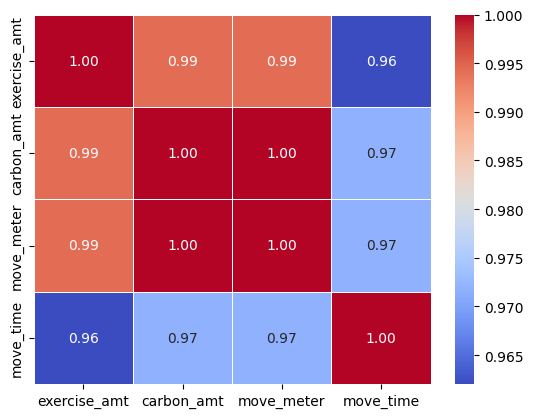

In [408]:
bike_corr = bike[['exercise_amt','carbon_amt','move_meter','move_time']]
sns.heatmap(bike_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


In [409]:
pie_data = bike.value_counts(['rent_type']).sort_values(ascending=False)
pie_data

rent_type
lindivo      336455
sindivo      259396
sindivi       17147
sgroup         9068
Name: count, dtype: int64

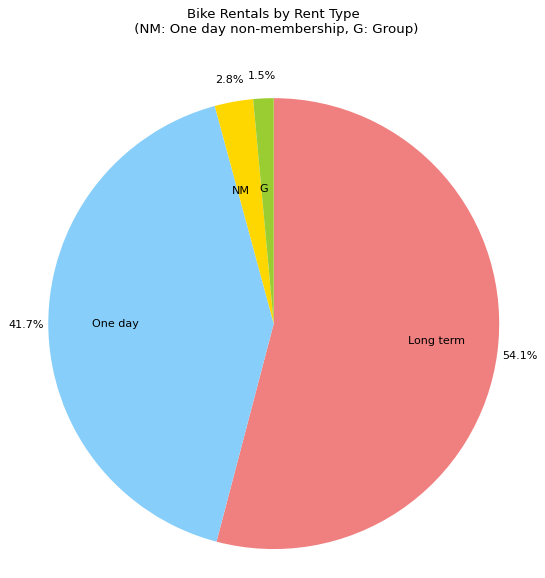

In [410]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(8, 8), dpi=80)

# Plotting the pie chart
colors = ['lightcoral','lightskyblue','gold','yellowgreen']
pie_labels = ['Long term','One day','NM','G']
wedges, texts, autotexts = ax.pie(pie_data, autopct='%1.1f%%', radius=3, labeldistance=0.60, pctdistance=1.1, colors=colors,counterclock=False, startangle=90, labels=pie_labels)
ax.axis('equal')  
ax.set_title('Bike Rentals by Rent Type\n (NM: One day non-membership, G: Group)', pad=40)  

# Display the pie chart
plt.show()

In [411]:
bike['rent_date'] = bike['rent_date'].astype(str)
bike['month_rent'] = bike['rent_date'].str[-2:]



In [412]:
# bike.value_counts(bike['month_rent']).sort_values(ascending=False)
total_month_use = bike.groupby(by=bike['month_rent'])['use_no'].sum()
total_month_use

month_rent
01    1571353
02    2231490
03    3885509
04    4082065
05    4952804
06    4933533
Name: use_no, dtype: int64

/var/folders/lv/6sn5r88509q7_c7kwjyblyn80000gn/T/ipykernel_4045/2759918900.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(["{:.0f}".format(x) for x in current_values])


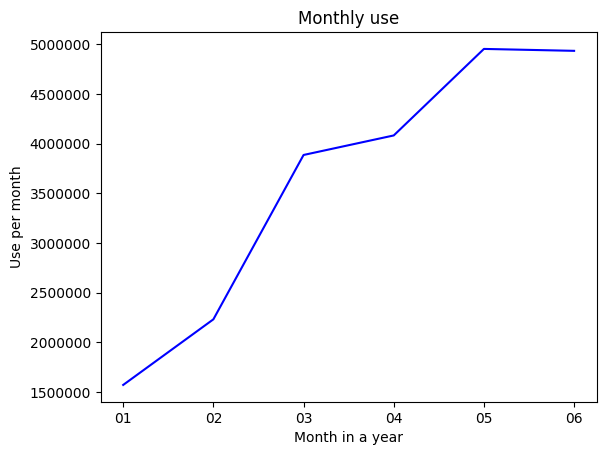

In [413]:
months = ["01", "02", "03", "04", "05", "06"]
values = [1571353, 2231490, 3885509, 4082065, 4952804, 4933533]
plt.plot(months, values, color="blue")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(["{:.0f}".format(x) for x in current_values])
plt.xlabel("Month in a year")
plt.ylabel("Use per month")
plt.title("Monthly use")
plt.show()

In [414]:
#minutes to hours
#한명의 회원이 하루동안 대여한 정보
bike['move_day'] = (bike['move_time']/60)/24

In [415]:
bike.head(10)

,rent_date,station_no,rent_type,gender,age_type,use_no,exercise_amt,carbon_amt,move_meter,move_time,month_rent,move_day
0,202301,102,sgroup,M,children,4,463.12,4.61,19892.32,116,01,0.080556
1,202301,102,sindivo,NaN,twenties,28,2406.34,20.15,86930.75,583,01,0.404861
2,202301,102,sindivo,NaN,thirties,17,1242.67,11.10,47889.20,716,01,0.497222
3,202301,102,sindivo,NaN,forties,6,532.56,4.11,17705.44,162,01,0.112500
4,202301,102,sindivo,NaN,fifties,1,160.15,1.29,5540.00,29,01,0.020139
5,202301,102,sindivo,NaN,other,9,882.57,8.06,34738.16,606,01,0.420833
6,202301,102,sindivo,F,twenties,31,1618.65,16.61,71598.25,797,01,0.553472
7,202301,102,sindivo,F,thirties,18,805.07,8.23,35460.54,451,01,0.313194
8,202301,102,sindivo,F,forties,6,447.38,4.32,18611.52,168,01,0.116667
9,202301,102,sindivo,F,fifties,1,204.04,1.71,7360.91,37,01,0.025694


In [416]:
bike['move_day'].idxmax()

408004

In [417]:
bike.iloc[408004]

rent_date            202305
station_no              207
rent_type           sindivo
gender                    F
age_type           twenties
use_no                 1886
exercise_amt      281057.85
carbon_amt          2748.73
move_meter      11887873.32
move_time            105489
month_rent               05
move_day           73.25625
Name: 408004, dtype: object

In [418]:
bike[(bike['station_no']==207) & (bike['rent_type']=='sindivo') & (bike['age_type']=='twenties') & (bike['gender']=='F')]

,rent_date,station_no,rent_type,gender,age_type,use_no,exercise_amt,carbon_amt,move_meter,move_time,month_rent,move_day
3072,202301,207,sindivo,F,twenties,96,12587.07,123.62,532834.88,5462,01,3.793056
92478,202302,207,sindivo,F,twenties,342,46805.12,454.24,1958384.42,20472,02,14.216667
193710,202303,207,sindivo,F,twenties,1715,236407.69,2338.96,10098171.23,97693,03,67.842361
300492,202304,207,sindivo,F,twenties,1674,234508.32,2301.15,9919035.91,96121,04,66.750694
408004,202305,207,sindivo,F,twenties,1886,281057.85,2748.73,11887873.32,105489,05,73.256250
517098,202306,207,sindivo,F,twenties,1226,178598.09,1753.20,7563624.13,67020,06,46.541667


In [419]:
bike['weight'] = (15000*bike['exercise_amt'])/(5.94*bike['move_meter'])
bike.head(10)
bike[(bike['rent_type']=='sindivo') & (bike['age_type']=='twenties') & (bike['gender']=='F') &(bike['weight']<50.00)]

#탄소절감량(kg) : 이동거리(km) * 0.232
#운동량(kcal) : 5.94 * 몸무게 * 이동거리(km) / 15(평균속도)

,rent_date,station_no,rent_type,gender,age_type,use_no,exercise_amt,carbon_amt,move_meter,move_time,month_rent,move_day,weight
1101,202301,137,sindivo,F,twenties,4,183.88,2.22,9549.11,63,01,0.043750,48.626881
1635,202301,156,sindivo,F,twenties,1,5.01,0.06,253.10,3,01,0.002083,49.986231
1804,202301,163,sindivo,F,twenties,4,426.44,5.13,22057.14,257,01,0.178472,48.821773
1896,202301,166,sindivo,F,twenties,4,156.16,1.92,8313.69,63,01,0.043750,47.433021
1992,202301,170,sindivo,F,twenties,2,93.90,1.12,4820.00,53,01,0.036806,49.195272
...,...,...,...,...,...,...,...,...,...,...,...,...,...
615193,202306,4802,sindivo,F,twenties,2,55.63,0.67,2927.03,26,06,0.018056,47.993973
615423,202306,4811,sindivo,F,twenties,2,198.26,2.33,10051.00,78,06,0.054167,49.811617
615895,202306,4829,sindivo,F,twenties,8,263.03,5.21,22441.71,156,06,0.108333,29.597440
616933,202306,4871,sindivo,F,twenties,4,74.02,0.89,3848.43,25,06,0.017361,48.570246


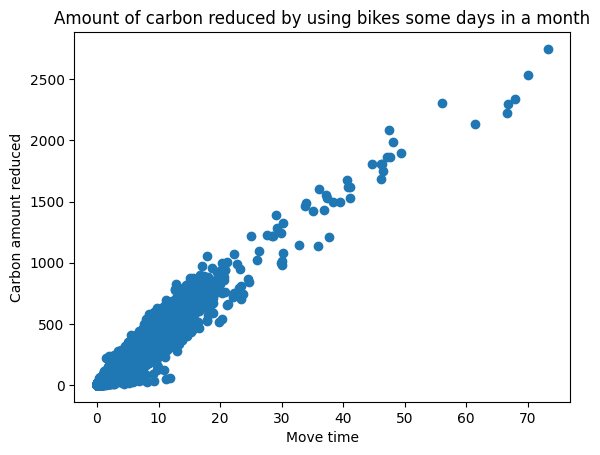

In [420]:
plt.scatter(y=bike['carbon_amt'],x=bike['move_day'])
plt.ylabel('Carbon amount reduced')
plt.xlabel('Move time')
plt.title('Amount of carbon reduced by using bikes some days in a month')
plt.show()


In [421]:
plt.bar(bike['station_no'])
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

In [ ]:
bike['exercise_amt'].idxmax()

408004